# <font color='green'>Tratando os dados do Spotify</font>

### Instalando as bibliotecas:

Matplotlib, Numpy, Pandas, Seaborn e Wordcloud.
Serão utilizados também os módulos OS e json.

In [52]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


In [57]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json
import os

sns.set_context("talk", font_scale=1)
sns.set_style("darkgrid")
sns.set_palette('tab10')
sns.set_color_codes()

In [58]:
# Lista de dados disponíveis 
os.listdir('dados/spotify_2/')

['.ipynb_checkpoints',
 'Follow.json',
 'Payments.json',
 'SearchQueries.json',
 'Userdata.json',
 'YourLibrary.json',
 'Identity.json',
 'Inferences.json',
 'Playlist1.json',
 'StreamingHistory0.json']

## <font color='green'>Compreendendo os dados de cada arquivo da base</font>

<font color='green'>__Follow.json:__</font>
```
    Isso inclui (quando disponível) no momento da solicitação:    
    O número de seguidores que a conta possui.      
    O número de outras contas que esta conta segue.        
    O número de outras contas que esta conta está bloqueando.
```
               
<font color='green'>__Payments.json__</font>
```
    Isso inclui detalhes do método de pagamento (quando disponível):
    Tipo - O tipo de cartão, por exemplo, Mastercard, Visa, etc., ou outra forma de pagamento, como     
    Vale-presente, PayPal.
    Número do cartão - quando a forma de pagamento for cartão, são apenas os quatro últimos dígitos.
    Expiração do cartão - quando o método de pagamento é por cartão, esta é a data de validade de quatro    
    dígitos (por exemplo, 18/07).
    Data de criação - A data em que os detalhes do pagamento foram fornecidos ao Spotify.
    País de pagamento - o país onde o cartão foi emitido, por exemplo, Reino Unido, Suécia.
    Código postal - o código postal no qual o cartão está registrado.
```
    
<font color='green'>__SearchQueries.json__</font>
```
    Uma lista de pesquisas feitas, incluindo:
    A data e a hora em que a pesquisa foi feita.
    Tipo de dispositivo / plataforma usado (como iOS, desktop).
    A consulta de pesquisa mostra o que o usuário digitou no campo de pesquisa.
    Os URIs de interação da pesquisa mostram a lista de Uniform Resource Identifiers (URI) dos resultados     
    da pesquisa com os quais o usuário interagiu.   
    Para comandos feitos por voz, consulte Entrada de voz abaixo.
```

<font color='green'>__Userdata.json__</font>
```
    Isso inclui (quando disponível):
    Nome de usuário do Spotify.
    Endereço de e-mail.
    País.
    Criado a partir do Facebook - Isso é verdadeiro se a conta foi criada através do Facebook.
    ID de usuário do Facebook - Isso é incluído se o usuário ativou o processamento de dados do Facebook e     
    vinculou sua conta do Spotify ao entrar usando o login do Facebook ou criou sua conta do Spotify     
    através do Facebook.
    Local preferido.
    Data de nascimento.
    Gênero.
    Código postal.
    Endereço postal.
    Número de celular.
    Operador móvel.
    Marca móvel.
    Criação da conta - Esta é a data de registro do usuário. 
```    
    
<font color='green'>__YourLibrary.json__</font>
```
    Um resumo (no ponto da data da solicitação) do conteúdo salvo em sua biblioteca (músicas, episódios,    
    programas, artistas e álbuns), incluindo:
    Nomes de entidades.
    Nomes de álbuns e shows.
    Criadores.
    Identificadores Uniformes de Recursos do Item (URIs). 
```

<font color='green'>__Identity.json__</font>
```
    Dados do usuário como nome da conta, primeiro e segundo nome, imagem do perfil e se o perfil é    
    verificado.
```

<font color='green'>__Inferences.json__</font>
```
    Tiramos certas inferências sobre seus interesses e preferências com base em seu uso do serviço Spotify    
    e usando dados obtidos de nossos anunciantes e outros parceiros de publicidade.    
    Isso inclui uma lista de segmentos de mercado aos quais você está atualmente associado.    
    Dependendo de suas configurações, esses dados podem ser usados para veicular publicidade com base em     
    interesses para você dentro do serviço Spotify.    
```

<font color='green'>__Playlist1.json__</font>
```
    Um resumo das listas de reprodução criadas ou salvas e todas as músicas salvas, incluindo:
    Nome da lista de reprodução.
    Data em que a lista de reprodução foi modificada pela última vez.
    Nomes das músicas contidas na lista de reprodução.
    Nomes de artistas para cada música.
    Nomes de álbuns ou episódios (se podcasts).
    Nome da faixa local, se o usuário carregou áudio salvo localmente para ser reproduzido no serviço     
    Spotify.
    Quaisquer descrições adicionadas pelo usuário à lista de reprodução.
    O número de seguidores da lista de reprodução. 
```

<font color='green'>__StreamingHistory0.json__</font>
```
    Uma lista de itens (por exemplo, músicas, vídeos e podcasts) ouvidos ou assistidos no ano anterior,     
    incluindo:
    Data e hora de quando o stream terminou no formato UTC (fuso horário universal coordenado).
    Nome do "criador" de cada fluxo (por exemplo, o nome do artista, se for uma faixa de música).
    Nome dos itens ouvidos ou assistidos (por exemplo, título da faixa musical ou nome do vídeo).
    “MsPlayed” - Significa quantos milissegundos a faixa foi ouvida. 
```

## OBS:    
__Os meus dados de playlist não foram usados desta conta, pois não tenho
playlists públicas nela. Para as playlists fiz o consumo da API da conta mais antiga
que tenho no Spotify.__

## <font color='green'>Importando os dados</font>

In [59]:
# 01 - Histórico das músicas ouvidas
df_history = pd.read_json('dados/spotify_2/StreamingHistory0.json')

In [60]:
df_history.head(5)

,endTime,artistName,trackName,msPlayed
0,2021-03-29 01:14,Birdtalker,Ankle Bone,50403
1,2021-03-29 01:20,Low Roar,Easy Way Out,43850
2,2021-03-29 01:20,Low Roar,I'll Keep Coming,352346
3,2021-04-05 20:43,Ana Santos,Pintinho amarelinho,7466
4,2021-04-05 20:45,Virtual Orchestra,"Bobeou, Dançou",23070


In [61]:
# Verificando o tamanho do dataset
df_history.shape[0]

679

In [62]:
# 02 - Músicas curtidas
with open('./dados/spotify_2/YourLibrary.json') as f:
    df_tracks = pd.DataFrame(json.load(f)['tracks'])
    
df_tracks.head()

,artist,album,track,uri
0,Norah Jones,Midnight Jones,After The Fall,spotify:track:21A89akXi8hZhGDJ35cO3b
1,Slipknot,Vol. 3: The Subliminal Verses,Duality,spotify:track:61mWefnWQOLf90gepjOCb3
2,Tiago Iorc,Troco Likes Ao Vivo,Mulher - Ao Vivo,spotify:track:0CXu3SkRSw3BdtGZqbejeL
3,Filipe Ret,Ilusão,Ilusão,spotify:track:3QpkDyuXdjxhIyLyKtyC6O
4,Patsy Cline,Showcase,Crazy - Single Version,spotify:track:3zpj9dvJABiyMrmLCPw6i8


In [63]:
# Verificando o tamanho do dataset
df_tracks.shape[0]

18

In [64]:
# 03 - Artistas curtidos
with open('./dados/spotify_2/YourLibrary.json') as f:
    df_artists = pd.DataFrame(json.load(f)['artists'])
    
df_artists.head(5)

,name,uri
0,3030,spotify:artist:3OHpci0ruhvaMv9F795LR5
1,ADL,spotify:artist:6Ywb1no2hXLazjIs4LUiQD
2,Aerosmith,spotify:artist:7Ey4PD4MYsKc5I2dolUwbH
3,Antonio Vivaldi,spotify:artist:2QOIawHpSlOwXDvSqQ9YJR
4,Arctic Monkeys,spotify:artist:7Ln80lUS6He07XvHI8qqHH


In [65]:
# Verificando o tamanho do dataset
df_artists.shape[0]

37

In [66]:
# 04 - Albuns curtidos
with open('./dados/spotify_2/YourLibrary.json') as f:
    df_albums = pd.DataFrame(json.load(f)['albums'])
    
df_albums.head(5)

,artist,album,uri
0,Norah Jones,Classic Jones,spotify:album:4CYITgeTMhc7NHyiTwV9hC
1,Criolo,Criolo E Emicida Ao Vivo,spotify:album:3xfZtthn2dlFtFfyyYKEf8
2,Johnny Cash,American III: Solitary Man,spotify:album:2zCyI9fuV5JrQzrO3kMwbw
3,Black Sabbath,Heaven & Hell,spotify:album:0Dj2B19o99FcJii6aPvMTr
4,Black Sabbath,Master of Reality,spotify:album:3kBG6q0aXKxzn01wKTwZr5


In [67]:
# Verificando o tamanho do dataset
df_albums.shape[0]

20

In [68]:
# 05 - Pesquisas realizadas
df_search = pd.read_json('dados/spotify_2/SearchQueries.json')
df_search.head(5)

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-01 17:41:04,ac/dc,"[spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8, spot..."
1,ANDROID,2021-05-01 17:42:15,low roar,[spotify:playlist:3NHJr2O6HVU1Dnywxogcyo]
2,ANDROID,2021-05-01 17:42:57,rap nacional,[spotify:playlist:07DFhdfMTy8VhvstdHqGEd]
3,ANDROID,2021-05-01 17:50:07,resistance,[spotify:playlist:27yXXsKK8JBZiymoNnXHde]
4,ANDROID,2021-05-02 14:19:27,london grammar,[spotify:playlist:37i9dQZF1DZ06evO0a532y]


In [69]:
# Verificando o tamanho do dataset
df_search.shape[0]

52

## <font color='green'>Relembrando os detalhes do arquivo Streaming History:</font>

Variáveis:

__endTime:__ Data e hora de quando o stream terminou no formato UTC (fuso horário universal coordenado).    
__artistName:__ Nome do "criador" de cada fluxo (por exemplo, o nome do artista, se for uma faixa de música).   
__trackName:__ Nome dos itens ouvidos ou assistidos (por exemplo, título da faixa musical ou nome do vídeo).   
__msPlayed:__ Significa quantos milissegundos a faixa foi ouvida. 

In [70]:
# Checando quantos dados temos em cada variável
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     679 non-null    object
 1   artistName  679 non-null    object
 2   trackName   679 non-null    object
 3   msPlayed    679 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.3+ KB


## Verificando se há dados nulos

In [71]:
# 01 - Histórico de músicas ouvidas
df_history.isnull().sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [72]:
# Estatísticas básicas das variáveis numéricas, no caso, da msPlayed
df_history.describe().round(2)

,msPlayed
count,679.00
mean,203317.13
std,225532.24
min,0.00
25%,153614.00
50%,199144.00
75%,240186.00
max,5422108.00


In [73]:
# 02 - Músicas curtidas
df_tracks.isnull().sum()

artist    0
album     0
track     0
uri       0
dtype: int64

In [74]:
# 03 - Artistas curtidos
df_artists.isnull().sum()

name    0
uri     0
dtype: int64

In [75]:
# 04 - Albuns curtidos
df_albums.isnull().sum()

artist    0
album     0
uri       0
dtype: int64

In [76]:
# 05 - Histórico de pesquisa
df_search.isnull().sum()

platform                 0
searchTime               0
searchQuery              0
searchInteractionURIs    0
dtype: int64

## <font color='green'>Verificando os tipos de dados em cada DataFrame<qfont>

In [77]:
# 01 - Histórico de músicas ouvidas
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     679 non-null    object
 1   artistName  679 non-null    object
 2   trackName   679 non-null    object
 3   msPlayed    679 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.3+ KB


In [78]:
# 02 - Músicas curtidas
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  18 non-null     object
 1   album   18 non-null     object
 2   track   18 non-null     object
 3   uri     18 non-null     object
dtypes: object(4)
memory usage: 704.0+ bytes


In [79]:
# 03 - Artistas curtidos
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    37 non-null     object
 1   uri     37 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [80]:
# 04 - Albuns curtidos
df_albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  20 non-null     object
 1   album   20 non-null     object
 2   uri     20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [81]:
# 05 - Histórico de pesquisa
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   platform               52 non-null     object
 1   searchTime             52 non-null     object
 2   searchQuery            52 non-null     object
 3   searchInteractionURIs  52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


## Convertendo as colunas endTime e msPlayed (Streaming History)

>A coluna endTime está com o tipo object, ou seja, string -> Quero o formato datetime     
>Já a coluna msPlayed está em milisegundos -> Quero em minutos

In [82]:
# Convertendo endTime de strings para datetime
df_history['endTime'] = pd.to_datetime(df_history['endTime'])

In [83]:
# Convertendo msPlayed para minutos e alterando seu nome para minPlayed
df_history['minPlayed'] = df_history['msPlayed']/1000/60
df_history.drop('msPlayed', axis=1, inplace=True)

In [84]:
# Exibindo o dtypes com uma melhor formatação, como um DataFrame
pd.DataFrame(df_history.dtypes, columns=['Tipos de dados'])

,Tipos de dados
endTime,datetime64[ns]
artistName,object
trackName,object
minPlayed,float64


In [85]:
df_history.head(5)

,endTime,artistName,trackName,minPlayed
0,2021-03-29 01:14:00,Birdtalker,Ankle Bone,0.840050
1,2021-03-29 01:20:00,Low Roar,Easy Way Out,0.730833
2,2021-03-29 01:20:00,Low Roar,I'll Keep Coming,5.872433
3,2021-04-05 20:43:00,Ana Santos,Pintinho amarelinho,0.124433
4,2021-04-05 20:45:00,Virtual Orchestra,"Bobeou, Dançou",0.384500


## <font color='green'>Convertendo a coluna searchTime (Search Queries)</font>

>A coluna searchTime está com o tipo object, ou seja, string -> Quero o formato datetime     

In [86]:
df_search = pd.read_json('dados/spotify_2/SearchQueries.json')
df_search.head(5)

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-01 17:41:04,ac/dc,"[spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8, spot..."
1,ANDROID,2021-05-01 17:42:15,low roar,[spotify:playlist:3NHJr2O6HVU1Dnywxogcyo]
2,ANDROID,2021-05-01 17:42:57,rap nacional,[spotify:playlist:07DFhdfMTy8VhvstdHqGEd]
3,ANDROID,2021-05-01 17:50:07,resistance,[spotify:playlist:27yXXsKK8JBZiymoNnXHde]
4,ANDROID,2021-05-02 14:19:27,london grammar,[spotify:playlist:37i9dQZF1DZ06evO0a532y]


In [87]:
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   platform               52 non-null     object
 1   searchTime             52 non-null     object
 2   searchQuery            52 non-null     object
 3   searchInteractionURIs  52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [88]:
# Convertendo searchTime de strings para datetime
df_search['searchTime'] = pd.to_datetime(df_search['searchTime'])

df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   platform               52 non-null     object        
 1   searchTime             52 non-null     datetime64[ns]
 2   searchQuery            52 non-null     object        
 3   searchInteractionURIs  52 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ KB


## <font color='green'>Adicionando colunas de dia da semana, mês e hora (Streaming History)</font>

In [89]:
dt = df_history['endTime'].copy()

In [90]:
# Criando algumas colunas de data e hora

# Dia da semana
df_history['dayOfWeek'] = df_history['endTime'].dt.day_name()

# Dia do Mês
df_history['dayOfMonth'] = df_history['endTime'].dt.day

# Hora do Dia
df_history['timeOfDay'] = df_history['endTime'].dt.hour

# Data
df_history['date'] = df_history['endTime'].dt.date

In [91]:
df_history.head(5)

,endTime,artistName,trackName,minPlayed,dayOfWeek,dayOfMonth,timeOfDay,date
0,2021-03-29 01:14:00,Birdtalker,Ankle Bone,0.840050,Monday,29,1,2021-03-29
1,2021-03-29 01:20:00,Low Roar,Easy Way Out,0.730833,Monday,29,1,2021-03-29
2,2021-03-29 01:20:00,Low Roar,I'll Keep Coming,5.872433,Monday,29,1,2021-03-29
3,2021-04-05 20:43:00,Ana Santos,Pintinho amarelinho,0.124433,Monday,5,20,2021-04-05
4,2021-04-05 20:45:00,Virtual Orchestra,"Bobeou, Dançou",0.384500,Monday,5,20,2021-04-05


In [92]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     679 non-null    datetime64[ns]
 1   artistName  679 non-null    object        
 2   trackName   679 non-null    object        
 3   minPlayed   679 non-null    float64       
 4   dayOfWeek   679 non-null    object        
 5   dayOfMonth  679 non-null    int64         
 6   timeOfDay   679 non-null    int64         
 7   date        679 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 42.6+ KB


In [93]:
df_history['date'] = pd.to_datetime(df_history['date'])
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     679 non-null    datetime64[ns]
 1   artistName  679 non-null    object        
 2   trackName   679 non-null    object        
 3   minPlayed   679 non-null    float64       
 4   dayOfWeek   679 non-null    object        
 5   dayOfMonth  679 non-null    int64         
 6   timeOfDay   679 non-null    int64         
 7   date        679 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 42.6+ KB


In [94]:
pd.DataFrame(df_history['artistName'].unique(), columns = ['Artistas'])

,Artistas
0,Birdtalker
1,Low Roar
2,Ana Santos
3,Virtual Orchestra
4,Aline Romeiro
...,...
152,PJ Harding
153,Passenger
154,Ali Gatie
155,Demi Lovato


In [95]:
df_history['artistName'].value_counts().head(20)

Djonga               193
Arctic Monkeys        58
Passenger             45
Pineapple StormTv     34
Vitão                 25
L7NNON                23
Fleet Foxes           20
Criolo                17
Céu                   13
3030                  12
Filipe Ret            11
Norah Jones           10
Aerosmith              9
Orochi                 7
Tiago Iorc             7
Johnny Cash            6
Emicida                6
BIN                    5
Malibu                 5
Baco Exu do Blues      5
Name: artistName, dtype: int64

In [96]:
(df_history['artistName'] == 'Djonga').value_counts()

False    486
True     193
Name: artistName, dtype: int64

In [97]:
df_history['trackName'].value_counts().head(20)

Procuro Alguém (prod. Coyote Beatz)                20
Mania (prod. Coyote Beatz)                         15
Easy Money                                         15
Hoje Não (prod. Coyote Beatz)                      14
Todo Errado (prod. Coyote Beatz)                   12
Esquimó                                            12
Gelo (prod. Coyote Beatz)                           9
O Cara de Óculos (prod. Coyote Beatz)               9
Eu Não Sou Tão Bom Assim                            9
Oto Patamá (prod. Coyote Beatz)                     8
Ó Quem Chega                                        8
Abre a porta                                        7
Nós                                                 7
Perdição                                            6
Deus Dará (prod. Coyote Beatz)                      6
Amr Sinto Falta da Nssa Ksa (prod. Renan Samam)     5
Xapralá                                             5
Berenice (Papasessions #6) [feat. CALIFFA]          5
LEAL                        

In [98]:
df_history['minPlayed'].max()

90.36846666666666

In [99]:
df_history.describe()

,minPlayed,dayOfMonth,timeOfDay
count,679.000000,679.000000,679.000000
mean,3.388619,14.569956,13.667158
std,3.758871,6.322972,6.037588
min,0.000000,1.000000,0.000000
25%,2.560233,13.000000,10.000000
50%,3.319067,15.000000,15.000000
75%,4.003100,20.000000,18.000000
max,90.368467,29.000000,23.000000


## <font color='green'>Músicas ouvidas por dia</font>

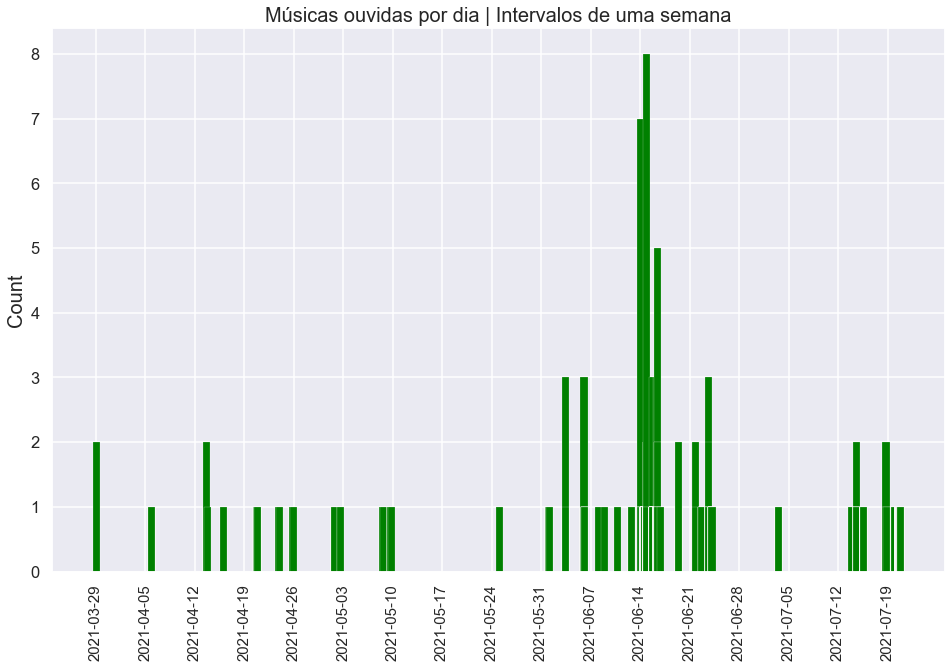

In [100]:
fig = plt.figure(figsize=(16,10))

# Músicas ouvidas por dia
x = df_history.groupby('endTime').size().index
y = df_history.groupby('endTime').size().values
xticks = pd.date_range(x[0],x[-1]).date[::7]
plt.bar(x,y, width=1, linewidth=0.2, color='green')
ax = plt.gca()

# Durante intervalos de uma semana
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize = 15)
ax.tick_params('x', rotation= 90)
ax.set_ylabel('Count', fontsize= 20)
ax.set_title('Músicas ouvidas por dia | Intervalos de uma semana', fontsize= 20)

plt.show()

## <font color='green'>Os 20 artistas mais ouvidos</font>

Text(0.5, 1.0, 'Minutos ouvidos por artista')

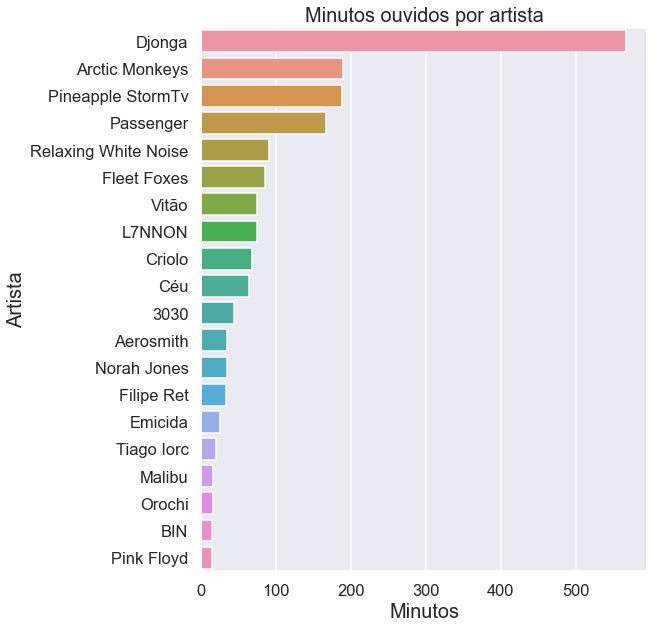

In [101]:
# Tratando alerta de erro futuro
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Definindo os dados a serem plotados
fig = plt.figure(figsize=(8,10))
ax = plt.subplot(111)
data = df_history.groupby('artistName')['minPlayed'].sum().sort_values(ascending=False)[:20]
x = data.index
y = data.values

# Criando a vizualização do gráfico com o Seaborn
sns.barplot(y, x, orient= "h", ax= ax)
ax.set_xlabel('Minutos', fontsize=20)
ax.set_ylabel('Artista', fontsize=20)
ax.set_title('Minutos ouvidos por artista', fontsize=20)

## <font color='green'>As 20 faixas mais ouvidas</font>

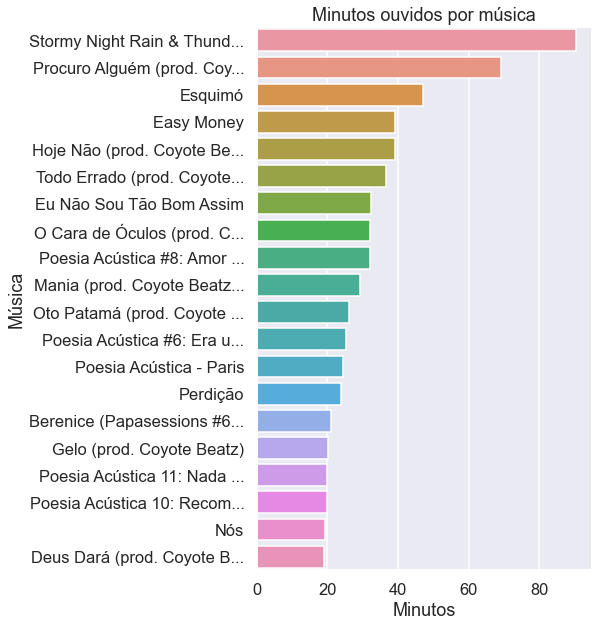

In [102]:
fig = plt.figure(figsize=(6,10))
ax = plt.subplot(111)
data = df_history.groupby('trackName')['minPlayed'].sum().sort_values(ascending=False)[:20]
x = data.index
y = data.values
sns.barplot(y,x, orient="h", ax = ax)
ax.set_xlabel('Minutos')
ax.set_ylabel('Música')

# Encurtando os rótulos, no caso de músicas com nome muito extenso
yticklabels = []
for label in ax.get_yticklabels():
    text = label.get_text()
    if len(text) > 25:
        yticklabels.append(text[:25] + '...')
    else:
        yticklabels.append(text)
ax.set_yticklabels(yticklabels)

plt.title('Minutos ouvidos por música')
plt.show()

## <font color='green'>Frequência de escuta por hora do dia</font>

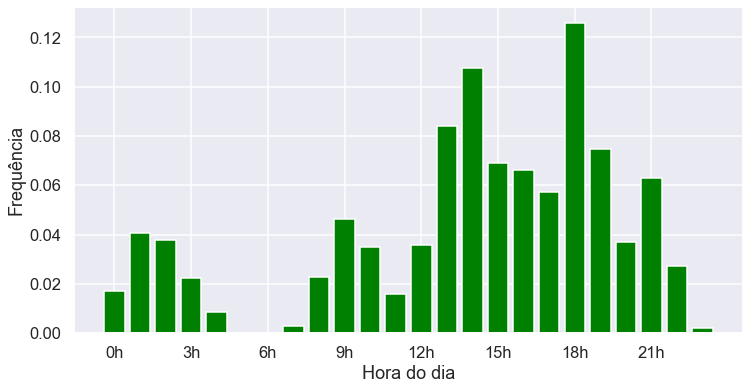

In [103]:
fig = plt.figure(figsize=(12,6))
data = df_history.groupby('timeOfDay')['minPlayed'].sum()
x, y = data.index, data.values
plt.bar(x,y/y.sum(), color='green')

xticks = np.arange(24)
xticklabels = [str(i) + 'h' for i in xticks]
plt.xticks(xticks[::3], xticklabels[::3])

plt.ylabel('Frequência')
plt.xlabel('Hora do dia')

plt.show()

## <font color='green'>Frequência de escuta por dia da semana</font>

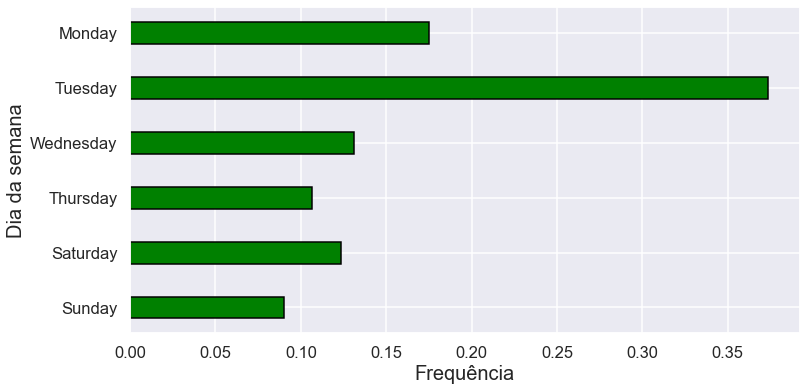

In [104]:
fig = plt.figure(figsize=(12,6))
data = df_history.groupby('dayOfWeek')['minPlayed'].sum()
data = data[[1,5,6,4,2,3]][::-1]
x, y = data.index, data.values

plt.barh(x,y/y.sum(), height=0.4, color='green', edgecolor='black')
plt.xlabel('Frequência', fontsize= 20)
plt.ylabel('Dia da semana', fontsize= 20)

plt.show()

## <font color='green'>Mapa de calor</font>

Text(58.421875, 0.5, 'Dia da semana')

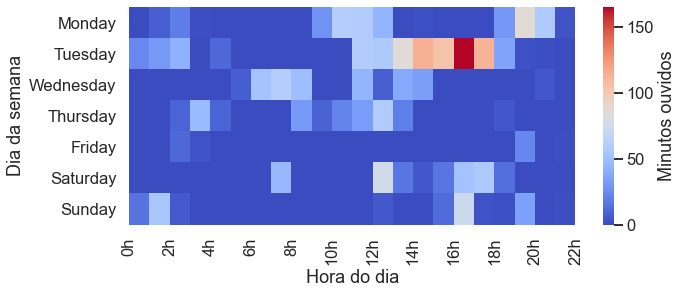

In [115]:
time_per_week = df_history.pivot_table(columns='timeOfDay', index='dayOfWeek', 
                                    values='minPlayed', aggfunc=np.sum).fillna(0)

# Os dias da semana foram embaralhados
time_per_week = time_per_week.iloc[[1,5,6,4,0,2,3],:]
fig = plt.figure(figsize=(10,4))
ax = sns.heatmap(time_per_week, cmap='coolwarm',
                 cbar_kws=dict(label='Minutos ouvidos'))

# Definindo detalhes como rótulos e orientação da imagem
xticks = np.arange(24)
xticklabels = [str(i) + 'h' for i in xticks]
ax.set_xticks(xticks[::2])
ax.set_xticklabels(xticklabels[::2])
ax.tick_params('x',rotation=90)

ax.set_xlabel('Hora do dia')
ax.set_ylabel('Dia da semana')

## <font color='green'>Nuvem de palavras</font>

Criei duas wordclouds, uma com os nomes dos artistas e outra com os nomes das músicas.    
Os artistas com mais músicas tem mais visibilidade.     
Seguindo a mesma lógica, as músicas tocadas mais vezes aparecem em maior destaque.


In [106]:
# Percorrendo a variável artistName para armazenar na variável músicas
artistas = " ".join(s for s in df_history['artistName'])

# Imprimindo a quantidade de palavras
print(f"Quantidade de Palavras: {len(artistas)}")

Quantidade de Palavras: 6633


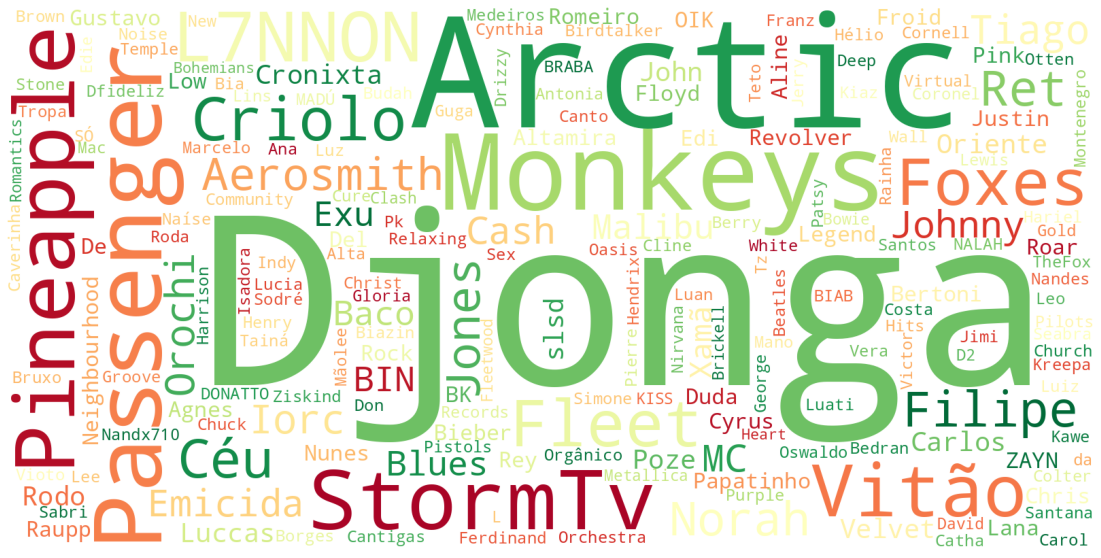

In [107]:
# Gerando uma nuvem de palavras
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800, random_state=1, colormap="RdYlGn", collocations=False).generate(artistas)

# Definindo detalhes da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
#wordcloud.to_file("artistas_spotify2_michelle.png");

In [108]:
# Percorrendo a variável trackName para armazenar na variável músicas
musicas = " ".join(s for s in df_history['trackName'])

# Imprimindo a quantidade de palavras
print(f"Quantidade de Palavras: {len(musicas)}")

Quantidade de Palavras: 13770


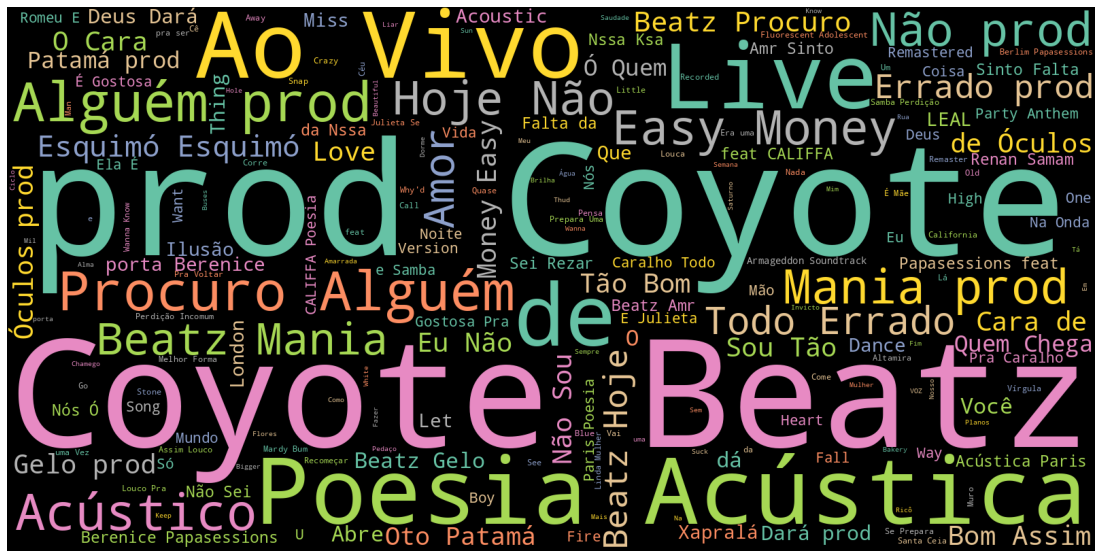

In [109]:
# Gerando uma nuvem de palavras
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800, random_state=1, colormap="Set2").generate(musicas)

# Definindo detalhes da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
#wordcloud.to_file("musicas_spotify_michelle.png");

## <font color='green'>Salvando os DataFrames com dados tratados</font>

In [110]:
# 01 - Salvando o histórico das músicas ouvidas
#df_history.to_csv('./dados_tratados/spotify_2/StreamingHistory.csv', index = None)

In [111]:
# 05 - Salvando os dados de busca 
#df_search.to_csv('./dados_tratados/spotify_2/SearchQueries.csv', index = None)

## <font color='green'>Referências para o código:</font>
## https://github.com/modw/spotify-data/blob/master/spotify-eda.ipynb


## <font color='green'>Fim</font>